<body>
    <h1>Course Project</h1>
    <p>Scraping a local job site for data scientist jobs in HK</p>
    <p>Cleaning the data and counting some key words</p>
</body>

In [1]:
#import requests
import bs4
from bs4 import BeautifulSoup
import pandas as pd
import time

import re
import pandas as pd
import math

In [2]:
df = pd.read_csv("ds_jobs_indeed_v01.csv")

In [3]:
df.shape #(128, 4)
df.drop_duplicates().shape
df.drop_duplicates(keep = 'first', inplace=True)
df.shape

(77, 4)

In [5]:
def R_required(x):
    return x.str.contains(pat = "[^a-z]R[^a-z]", case = False)

def Python_required(x):
    return x.str.contains(pat = "Python", case = False)

df['R_required'] = R_required(df['job_text'])
df['Python_required'] = Python_required(df['job_text'])

In [6]:
df.head()

df.index

df[df['R_required']].index
set(df[df['Python_required']].index)
set(df[df['R_required']].index)


{0,
 2,
 3,
 5,
 6,
 7,
 9,
 10,
 20,
 22,
 23,
 25,
 27,
 28,
 36,
 37,
 38,
 39,
 41,
 44,
 45,
 52,
 53,
 59,
 60,
 69,
 70,
 71,
 73,
 74,
 75,
 83,
 84,
 87,
 88,
 89,
 90,
 91,
 92,
 99,
 101,
 106,
 107,
 108,
 116,
 122,
 123}

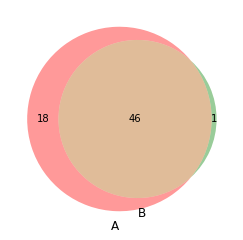

In [8]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

#venn2([set(['A', 'B', 'C', 'D']), set(['D', 'E', 'F'])])

#venn2([set(df[df['R_required']].index), set(df[df['Python_required']].index)])
Python_Required = set(df[df['Python_required']].index)
R_Required = set(df[df['R_required']].index)

venn2([Python_Required,R_Required])
#venn2([ set(df[df['Python_required']].index), set(df[df['R_required']].index))]

plt.show()

In [16]:
surname = "Rasputin"
advisor = surname
del surname

advisor
bool( [ "me", "myself", "I"] )


True

In [18]:
a = [0,1,2]
b = [3,4,5]

c = (a,b)
c

([0, 1, 2], [3, 4, 5])

In [21]:
b[0] = 99
c

([0, 1, 2], [99, 4, 5])

In [73]:


df['job_text'].str.match(".*Python.*")
df['job_text'].str.contains(pat = "Python", case = False)

#x = df['job_text'].str.contains(pat = " R[^a-z]", case = False)
#print(sum(x)) #43

# also finds R&D
y = df['job_text'].str.contains(pat = "[^a-z]R[^a-z]", case = False)
print(sum(y)) #47

#x = df['job_text'].str.contains(pat = " R&D", case = False)
#print(sum(x)) #43


#df[~ x & y]\
df[y]

47


,job_title,company_name,details_link,job_text
0,"Data Scientist, senior level",Terminal 1,https://www.indeed.hk/viewjob?jk=8fac5bf3bd04d950,Responsibilities\r\nResponsible for the analyt...
2,Data Scientist,RADICA SYSTEMS LIMITED,https://www.indeed.hk/viewjob?jk=f1621540076157c1,"We love DATA, we believe DATA can make our lif..."
3,Data Scientist - Media,MICHAEL PAGE,https://www.indeed.hk/viewjob?jk=6567706422d33abe,"As part of PageGroup, Michael Page is a leadin..."
5,Data Scientist,Cathay Pacific,https://www.indeed.hk/viewjob?jk=d92b5c3ca5f3d1f7,Department: Digital\r\nReports to: Operationa ...
6,Data Scientist,Neo Derm Ltd.,https://www.indeed.hk/viewjob?jk=8065aee734f99b7c,:\r\nUndertake processing of structure and uns...
7,Data Scientist,AXA,https://www.indeed.hk/viewjob?jk=b3b7b9e98a61c1fa,- Data Scientist (180003VK)\r\nJOB DESCRIPTION...
9,"Data Scientist (NLP, Deep Learning, Text Analy...",Thinkcol.AI,https://www.indeed.hk/viewjob?jk=dec891350591d503,"$15,000 - $30,000 a monthRoles and responsibil..."
10,Data Scientist,AUREXIA Consulting,https://www.indeed.hk/viewjob?jk=608c233395777324,Aurexia is a European and Asian based business...
20,Data Scientist,Asia Miles,https://www.indeed.hk/viewjob?jk=c1c83d3135356139,"Data Scientist\r\n\r\nDepartment\r\nInsight, A..."
22,Data Scientist,SOUTH CHINA MORNING POST PUBLISHERS LTD,https://www.indeed.hk/viewjob?jk=d1e710d3d5a4d45b,Purpose of the position:\r\n\r\nThe Data Analy...


In [28]:
#df[df['job_text'].str.match("Responsibilities")]

df[df['job_text'].str.match(".*Python.*", case=False)]


,job_title,company_name,details_link,job_text
9,"Data Scientist (NLP, Deep Learning, Text Analy...",Thinkcol.AI,https://www.indeed.hk/viewjob?jk=dec891350591d503,"$15,000 - $30,000 a monthRoles and responsibil..."
39,Multiple Quants / Data Scientists – Machine Le...,BAH Partners,https://www.indeed.hk/viewjob?jk=549c4edbd4b9e3cf,Multiple Quantitative Analysts / Data Scientis...
42,AI Engineer / Data Scientist,Animoca Brands Limited,https://www.indeed.hk/viewjob?jk=dfaa35ed185b9754,Our mission is to help people achieve their fi...
104,Data Scientist,Harbridge Partners Limited,https://www.indeed.hk/viewjob?jk=597da94283824a2c,Our client is recognized as a leader in softwa...
122,data & customer analytics - big data - 75k,Randstad,https://www.indeed.hk/viewjob?jk=13c203c3f98410a1,"Our client, an established US based company, i..."


In [38]:
import pandas as pd
df = pd.DataFrame({"A":["foo", "foo", "foo", "bar"], "B":[0,0,1,1], "C":["A","A","B","A"]})
df


,A,B,C
0,foo,0,A
1,foo,0,A
2,foo,1,B
3,bar,1,A


In [39]:
df.drop_duplicates( keep='first')

,A,B,C
0,foo,0,A
2,foo,1,B
3,bar,1,A


In [9]:
sum(df.duplicated()) # 51
df.shape # (128, 4)
df[df.duplicated()]

df[df['company_name'] == 'Terminal 1']

,job_title,company_name,details_link,job_text
0,"Data Scientist, senior level",Terminal 1,https://www.indeed.hk/viewjob?jk=8fac5bf3bd04d950,Responsibilities\r\nResponsible for the analyt...
12,"Data Scientist, senior level",Terminal 1,https://www.indeed.hk/viewjob?jk=8fac5bf3bd04d950,Responsibilities\r\nResponsible for the analyt...
17,"Data Scientist, senior level",Terminal 1,https://www.indeed.hk/viewjob?jk=8fac5bf3bd04d950,Responsibilities\r\nResponsible for the analyt...
19,"Data Scientist, senior level",Terminal 1,https://www.indeed.hk/viewjob?jk=8fac5bf3bd04d950,Responsibilities\r\nResponsible for the analyt...
32,"Data Scientist, senior level",Terminal 1,https://www.indeed.hk/viewjob?jk=8fac5bf3bd04d950,Responsibilities\r\nResponsible for the analyt...
48,"Data Scientist, senior level",Terminal 1,https://www.indeed.hk/viewjob?jk=8fac5bf3bd04d950,Responsibilities\r\nResponsible for the analyt...
64,"Data Scientist, senior level",Terminal 1,https://www.indeed.hk/viewjob?jk=8fac5bf3bd04d950,Responsibilities\r\nResponsible for the analyt...
93,"Data Scientist, senior level",Terminal 1,https://www.indeed.hk/viewjob?jk=8fac5bf3bd04d950,Responsibilities\r\nResponsible for the analyt...
109,"Data Scientist, senior level",Terminal 1,https://www.indeed.hk/viewjob?jk=8fac5bf3bd04d950,Responsibilities\r\nResponsible for the analyt...
125,"Data Scientist, senior level",Terminal 1,https://www.indeed.hk/viewjob?jk=8fac5bf3bd04d950,Responsibilities\r\nResponsible for the analyt...
